In [1]:
import uproot 
import awkward as ak
import ROOT
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fname = "E67CA07B-E7F3-FC41-8C69-6EEF0F0285D3.root"

In [3]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [4]:
Events.fields

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nSubGenJetAK8',
 'Generator_binvar',
 'Generator_scalePDF',
 'Generator_weight',
 'Generator_x1',
 'Generator_x2',
 'Generator_xpdf1',
 'Generator_xpdf2',
 'Generator_id1'

In [6]:
data = np.array(Events.event)

xmin, xmax = int(data.min()), int(data.max()) + 1
nbins = 1   # ensure Python int

h = ROOT.TH1F("h", "Event Number Distribution;Event Number;Counts", nbins, float(xmin), float(xmax))

for val in data:
    h.Fill(float(val))

c = ROOT.TCanvas("c", "c", 800, 600)
h.SetLineColor(ROOT.kBlue)
h.SetLineWidth(2)
h.Draw("HIST")

leg = ROOT.TLegend()
leg.AddEntry(h, "Events", "l")
leg.Draw()

c.SaveAs("event_number_distribution.png")




Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file event_number_distribution.png has been created


In [5]:
gen = Events.GenPart
photons = gen[(gen.pdgId == 22) & (gen.status == 1)]
mother_idx = photons.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
photons_from_a = photons[from_a_mask]

# mask_two_photons = ak.num(photons_from_a.eta) >= 2
# photons_from_a = photons_from_a[mask_two_photons]

In [19]:
ak.any(ak.num(photons_from_a.pt)==0)

True

In [15]:
for i in (ak.num(photons_from_a.pt[:100])):
    print(i)

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
0
2
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


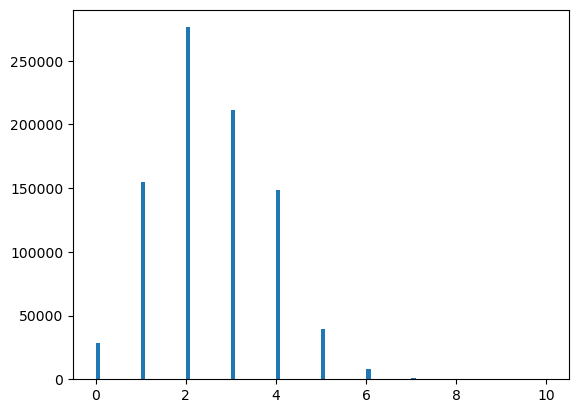

In [20]:
plt.hist(ak.num(Events.Photon.pt), range = (0, 10), bins = 100);

In [19]:
pt_cut = Events.Photon.pt>30.0

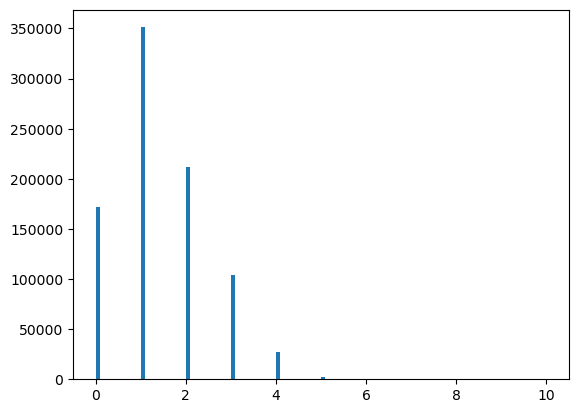

In [20]:
plt.hist(ak.num(Events.Photon[pt_cut].pt),range= (0,10), bins = 100);

In [25]:
mask = ak.num(Events.Photon[pt_cut].pt) > 0
ratio = ak.sum(mask) / len(Events)

In [31]:
Events[ak.num(Events.Photon[pt_cut].pt) > 0].Photon.pt

<Array [[40.2], ..., [81.1, 27.6, ..., 18.4]] type='696125 * var * float32'>

In [32]:
Events_all = ak.from_parquet("AllDatasets.parquet")

In [33]:
Events_all.fields

['pu_true',
 'nPhoton',
 'higgs_pt',
 'higgs_eta',
 'higgs_phi',
 'A_pt_1',
 'A_pt_2',
 'A_eta_1',
 'A_eta_2',
 'A_phi_1',
 'A_phi_2',
 'leading_A_pt',
 'subleading_A_pt',
 'leading_A_eta',
 'subleading_A_eta',
 'leading_A_phi',
 'subleading_A_phi',
 'pho_from_a_pt_1',
 'pho_from_a_pt_2',
 'pho_from_a_eta_1',
 'pho_from_a_eta_2',
 'pho_from_a_phi_1',
 'pho_from_a_phi_2',
 'lead_pt_pho_gen',
 'sublead_pt_pho_gen',
 'lead_eta_pho_gen',
 'sublead_eta_pho_gen',
 'lead_phi_pho_gen',
 'sublead_phi_pho_gen',
 'bquark_from_a_pt_1',
 'bquark_from_a_pt_2',
 'bquark_from_a_eta_1',
 'bquark_from_a_eta_2',
 'bquark_from_a_phi_1',
 'bquark_from_a_phi_2',
 'lead_pt_bquark_gen',
 'sublead_pt_bquark_gen',
 'lead_eta_bquark_gen',
 'sublead_eta_bquark_gen',
 'lead_phi_bquark_gen',
 'sublead_phi_bquark_gen',
 'Reco_pho_pt',
 'Reco_pho_eta',
 'Reco_pho_phi',
 'Reco_photon_lead_pt_all',
 'Reco_photon_sublead_pt_all',
 'Reco_photon_lead_eta_all',
 'Reco_photon_sublead_eta_all',
 'Reco_photon_lead_phi_all',
 

In [43]:
Events_all[Events_all["dataset"] == 'M20_RunIISummer20UL16NanoAODAPVv9'].Reco_photon_sublead_pt_all[0]

<Array [nan, 44, 14.1, 16.7, ..., 34.3, 23, 11, 39.3] type='449937 * float64'>

In [28]:
mask

<Array [True, True, False, True, ..., True, False, True] type='868000 * bool'>

In [27]:
ratio*100

80.19873271889401

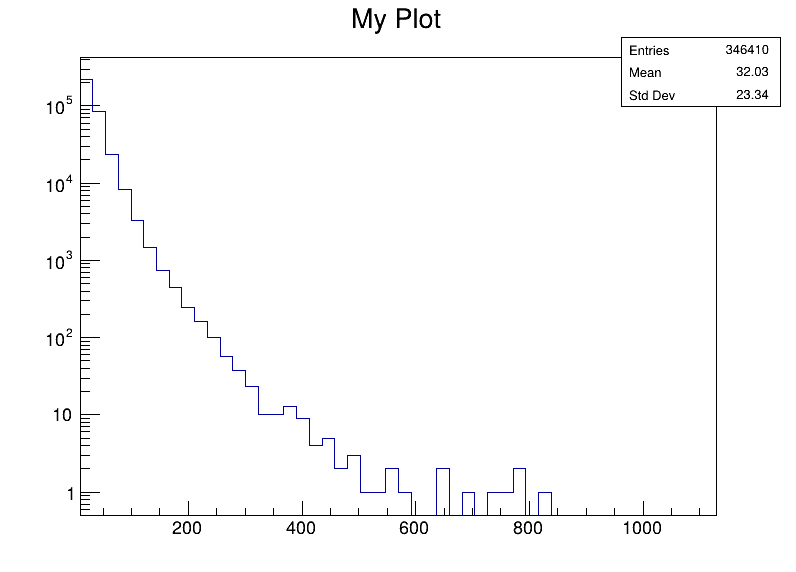

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file hist_log.png has been created


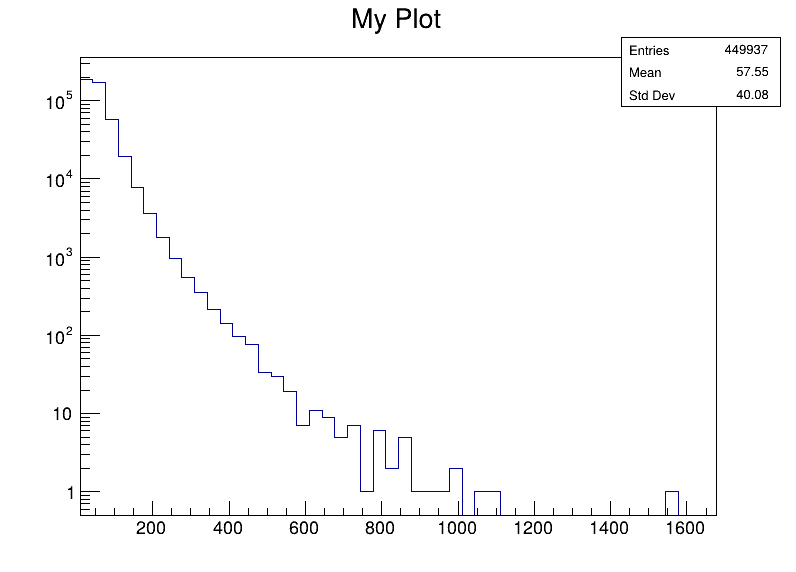

In [51]:
from IPython.display import Image

# Your filtered array
arr = Events_all[Events_all["dataset"] == 'M20_RunIISummer20UL16NanoAODAPVv9'].Reco_photon_sublead_pt_all[0]
arr_no_nan = arr[~np.isnan(arr)]

# Create histogram
hist = ROOT.TH1F("h", "My Plot", 50, min(arr_no_nan), max(arr_no_nan))
for val in arr_no_nan:
    hist.Fill(val)

# Create canvas
c = ROOT.TCanvas("c", "c", 800, 600)
ROOT.gStyle.SetOptStat(1110)

# Draw and set log scale
hist.Draw()
c.SetLogy()  # set log scale
c.Update()

# Save image and display in Jupyter
c.SaveAs("hist_log.png")
Image(filename="hist_log.png")


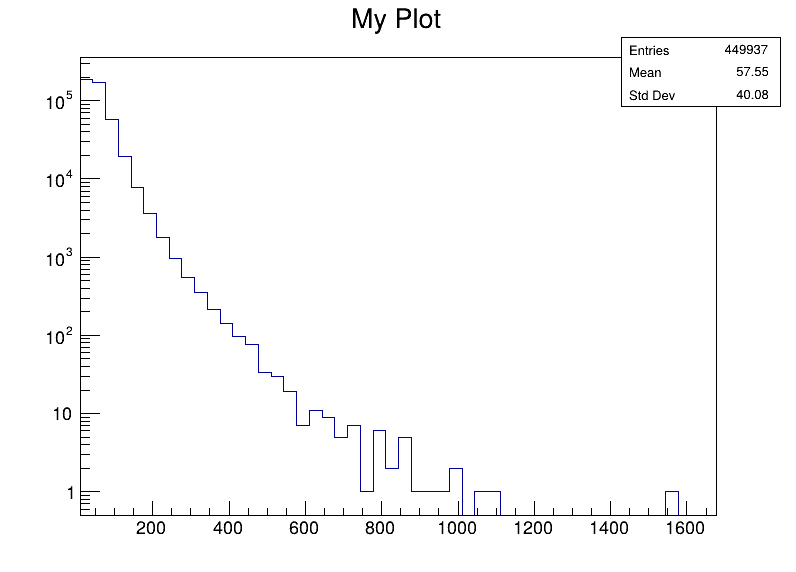

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file hist_sublead_log.png has been created


In [52]:
from IPython.display import Image

# Your filtered array
arr = Events_all[Events_all["dataset"] == 'M20_RunIISummer20UL16NanoAODAPVv9'].Reco_photon_lead_pt_all[0]
arr_no_nan = arr[~np.isnan(arr)]

# Create histogram
hist_2 = ROOT.TH1F("h", "My Plot", 50, min(arr_no_nan), max(arr_no_nan))
for val in arr_no_nan:
    hist_2.Fill(val)

# Create canvas
c_2 = ROOT.TCanvas("c", "c", 800, 600)
ROOT.gStyle.SetOptStat(1110)

# Draw and set log scale
hist_2.Draw()
c_2.SetLogy()  # set log scale
c_2.Update()

# Save image and display in Jupyter
c_2.SaveAs("hist_sublead_log.png")
Image(filename="hist_sublead_log.png")

In [25]:
bquarks = gen[abs(gen.pdgId) == 5]
bquarks = gen[abs(gen.pdgId) == 5]
mother_idx = bquarks.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
bquarks_from_a = bquarks[from_a_mask]

In [32]:
ak.any(ak.num(bquarks_from_a.pt)<2)

False

In [30]:
unique_status = np.unique(ak.flatten(bquarks_from_a.status))

In [31]:
unique_status

<Array [23] type='1 * int32'>

In [ ]:
ak.any(bquarks.pt<2)

True

In [65]:
mask_two_photons = ak.num(photons_from_a.eta) >= 2
reco_photons = Events.Photon[mask_two_photons]
Reco_pho_eta_uf = reco_photons.eta
Reco_pho_phi_uf = reco_photons.phi

mask_two_photons = ak.num(photons_from_a.eta) >= 2  # Only 2 Photons and Zero Photons case are there
photons_from_a = photons_from_a[mask_two_photons]

pho_from_a_pt = photons_from_a.pt
pho_from_a_eta = photons_from_a.eta
pho_from_a_phi = photons_from_a.phi

pho_from_a_pt_1 = pho_from_a_pt[:, 0]
pho_from_a_pt_2 = pho_from_a_pt[:, 1]
pho_from_a_eta_1 = pho_from_a_eta[:, 0]
pho_from_a_eta_2 = pho_from_a_eta[:, 1]
pho_from_a_phi_1 = pho_from_a_phi[:, 0]
pho_from_a_phi_2 = pho_from_a_phi[:, 1]

def dR(eta1, phi1, eta2, phi2):
    d_eta = eta1 - eta2
    d_phi = phi1 - phi2
    return np.sqrt(d_eta**2 + d_phi**2)

dR_pho_1 = dR(pho_from_a_eta_1, pho_from_a_phi_1, Reco_pho_eta_uf, Reco_pho_phi_uf)
dR_pho_2 = dR(pho_from_a_eta_2, pho_from_a_phi_2, Reco_pho_eta_uf, Reco_pho_phi_uf)

In [37]:
pho_from_a_eta_1

<Array [-3.45, 0.469, 4.16, ..., 1.99, -1.59, 0.75] type='817755 * float32'>

In [40]:
Reco_pho_eta_uf

<Array [[-2.44], ..., [0.147, ..., -0.698]] type='817755 * var * float32'>

In [36]:
dR_pho_1

<Array [[1.2], ..., [0.772, 1.84, ..., 3.39]] type='817755 * var * float32'>

In [41]:
min_idx_1 = ak.argmin(dR_pho_1, axis=1)
min_idx_2 = ak.argmin(dR_pho_2, axis=1)

In [42]:
min_idx_1

<Array [0, 0, None, 1, 1, 1, 0, ..., 1, 0, 0, 2, 2, 0] type='817755 * ?int64'>

In [43]:
photon_idx = ak.local_index(reco_photons)

In [44]:
photon_idx

<Array [[0], [0, 1], ..., [0, ...], [0, 1, 2, 3]] type='817755 * var * int64'>

In [52]:
photon_idx == min_idx_1[:,None]

<Array [[True], ..., [True, False, ..., False]] type='817755 * var * ?bool'>

In [8]:

photon_idx = ak.local_index(reco_photons)
mask_idx_1 = photon_idx == min_idx_1[:, None]
mask_idx_2 = photon_idx == min_idx_2[:, None]

mask_dR_1 = dR_pho_1 < 0.1
mask_dR_2 = dR_pho_2 < 0.1

mask_sel_1 = mask_idx_1 & mask_dR_1
mask_sel_2 = mask_idx_2 & mask_dR_2

# mask_sel_1 = mask_idx_1
# mask_sel_2 = mask_idx_2


selected_photon_1 = ak.firsts(reco_photons[mask_sel_1])
selected_photon_2 = ak.firsts(reco_photons[mask_sel_2])

In [9]:
reco_photons[mask_sel_1].pt

<Array [[], [37], [], ..., [20.9], [18.4]] type='817755 * var * ?float32'>

In [10]:
for i in (reco_photons[mask_sel_1].pt[:100]):
    print(i)

[]
[37]
[]
[28.5]
[22.8]
[25.1]
[]
[53.8]
[]
[35]
[50.5]
[109]
[]
[]
[]
[]
[16.6]
[]
[16.5]
[]
[]
[]
[78.5]
[99.4]
[39.8]
[]
[]
[]
[31.9]
[26.6]
[51.1]
[19.8]
[40.7]
[174]
[]
[21.5]
[34.7]
[105]
[46.6]
[74.5]
[60.5]
[29.6]
[]
[27.6]
[67.9]
[18.6]
[]
[]
[80.4]
[48.6]
[55.8]
[30.9]
[47.9]
[12.1]
[]
[56.2]
[58.7]
[89.2]
[]
[11.5]
[35.3]
[31.6]
[44]
[23.3]
[44.4]
[26.4]
[22.3]
[]
[61.3]
[39.3]
[35]
[]
[]
[38.6]
[]
[18.8]
[]
[82.7]
[]
[21.4]
[22.2]
[37.5]
[28.8]
[17.1]
[66.8]
[19.9]
[12.3]
[]
[13.9]
[37.7]
[12.9]
[25.5]
[41.5]
[41]
[42.3]
[66.3]
[45.4]
[36.3]
[14.7]
[39.2]


In [11]:
for i in (ak.firsts(reco_photons[mask_sel_1].pt)[:100]):
    print(i)

None
37.04755
None
28.473555
22.818876
25.11404
None
53.836132
None
35.03064
50.468174
108.5216
None
None
None
None
16.59048
None
16.54477
None
None
None
78.53438
99.40898
39.81231
None
None
None
31.893631
26.62124
51.104706
19.8455
40.691803
174.03
None
21.48737
34.682022
105.11107
46.56103
74.535934
60.474087
29.594038
None
27.570261
67.925064
18.60612
None
None
80.43553
48.640125
55.797832
30.909723
47.939953
12.065495
None
56.218292
58.725353
89.2388
None
11.484099
35.28169
31.609983
43.96959
23.340866
44.360733
26.374853
22.34884
None
61.344875
39.306316
35.0469
None
None
38.644733
None
18.786854
None
82.73628
None
21.368162
22.199644
37.47471
28.827261
17.070108
66.7946
19.945362
12.256371
None
13.93786
37.710976
12.914109
25.488031
41.53479
40.98282
42.329315
66.347015
45.376816
36.27775
14.675435
39.233036


In [48]:
min_idx_1[:, None]

<Array [[0], [0], [None], [1], ..., [2], [2], [0]] type='817755 * 1 * ?int64'>

In [12]:
Gen_photon_pt_1 = ak.to_numpy(pho_from_a_pt_1[~ak.is_none(selected_photon_1.pt)])  # These are not all the Gen photons
Gen_photon_pt_2 = ak.to_numpy(pho_from_a_pt_2[~ak.is_none(selected_photon_2.pt)])
Genmatched_photon_1_clean = selected_photon_1[~ak.is_none(selected_photon_1)]
Genmatched_photon_2_clean = selected_photon_2[~ak.is_none(selected_photon_2)]

In [13]:
Genmatched_photon_1_clean.pt

<Array [37, 28.5, 22.8, 25.1, ..., 32.9, 20.9, 18.4] type='596932 * ?float32'>

In [4]:
gen = Events.GenPart
higgs_mask = (gen.pdgId == 25) & (gen.status == 62)
higgs = gen[higgs_mask]

higgs_pt = ak.flatten(higgs.pt)
higgs_eta = ak.flatten(higgs.eta)
higgs_phi = ak.flatten(higgs.phi)

is_A = (abs(gen.pdgId) == 35)

A = gen[is_A]

A_pt = A.pt
A_eta = A.eta
A_phi = A.phi

A_pt_1 = A_pt[:,0]
A_pt_2 = A_pt[:,1]
A_eta_1 = A_eta[:,0]
A_eta_2 = A_eta[:,1]
A_phi_1 = A_phi[:,0]
A_phi_2 = A_phi[:,1]

sorted_As = A[ak.argsort(A_pt, axis=1, ascending=False)]

leading_A_pt = sorted_As.pt[:,0]
subleading_A_pt = sorted_As.pt[:,1]
leading_A_eta = sorted_As.eta[:,0]
subleading_A_eta = sorted_As.eta[:,1]
leading_A_phi = sorted_As.phi[:,0]
subleading_A_phi = sorted_As.phi[:,1]

photons = gen[(gen.pdgId == 22) & (gen.status == 1)]
mother_idx = photons.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
photons_from_a = photons[from_a_mask]

mask_two_photons = ak.num(photons_from_a.eta) >= 2  # Only 2 Photons and Zero Photons case are there
photons_from_a = photons_from_a[mask_two_photons]

pho_from_a_pt = photons_from_a.pt
pho_from_a_eta = photons_from_a.eta
pho_from_a_phi = photons_from_a.phi

pho_from_a_pt_1 = pho_from_a_pt[:, 0]
pho_from_a_pt_2 = pho_from_a_pt[:, 1]
pho_from_a_eta_1 = pho_from_a_eta[:, 0]
pho_from_a_eta_2 = pho_from_a_eta[:, 1]
pho_from_a_phi_1 = pho_from_a_phi[:, 0]
pho_from_a_phi_2 = pho_from_a_phi[:, 1]

sorted_photons = photons_from_a[ak.argsort(photons_from_a.pt, axis=1, ascending=False)]
lead_pt_pho_gen = sorted_photons.pt[:, 0]
sublead_pt_pho_gen = sorted_photons.pt[:, 1]
lead_eta_pho_gen = sorted_photons.eta[:, 0]
sublead_eta_pho_gen = sorted_photons.eta[:, 1]
lead_phi_pho_gen = sorted_photons.phi[:, 0]
sublead_phi_pho_gen = sorted_photons.phi[:, 1]

bquarks = gen[abs(gen.pdgId) == 5]
mother_idx = bquarks.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
bquarks_from_a = bquarks[from_a_mask]

bquark_from_a_pt = bquarks_from_a.pt
bquark_from_a_eta = bquarks_from_a.eta
bquark_from_a_phi = bquarks_from_a.phi

bquark_from_a_pt_1 = bquark_from_a_pt[:, 0]
bquark_from_a_pt_2 = bquark_from_a_pt[:, 1]
bquark_from_a_eta_1 = bquark_from_a_eta[:, 0]
bquark_from_a_eta_2 = bquark_from_a_eta[:, 1]
bquark_from_a_phi_1 = bquark_from_a_phi[:, 0]
bquark_from_a_phi_2 = bquark_from_a_phi[:, 1]

sorted_bquarks = bquarks_from_a[ak.argsort(bquarks_from_a.pt, axis=1, ascending=False)]
lead_pt_bquark_gen = sorted_bquarks.pt[:, 0]
sublead_pt_bquark_gen = sorted_bquarks.pt[:, 1]
lead_eta_bquark_gen = sorted_bquarks.eta[:, 0]
sublead_eta_bquark_gen = sorted_bquarks.eta[:, 1]
lead_phi_bquark_gen = sorted_bquarks.phi[:, 0]
sublead_phi_bquark_gen = sorted_bquarks.phi[:, 1]

reco_photons = Events.Photon[mask_two_photons]
has_photon = ak.num(reco_photons) >= 1
Reco_photons_all = reco_photons[has_photon]
Reco_pho_pt = ak.flatten(reco_photons.pt)
Reco_pho_eta = ak.flatten(reco_photons.eta)
Reco_pho_phi = ak.flatten(reco_photons.phi)

Reco_pho_pt_uf = reco_photons.pt
Reco_pho_eta_uf = reco_photons.eta
Reco_pho_phi_uf = reco_photons.phi

sorted_reco_photons = reco_photons[ak.argsort(reco_photons.pt, axis=1, ascending=False)]
Sorted_reco_photons_all = Reco_photons_all[ak.argsort(Reco_photons_all.pt, axis=1, ascending=False)]

Reco_photon_lead_pt_all = Sorted_reco_photons_all.pt[:,0]
Reco_photon_sublead_pt_all = ak.pad_none(Sorted_reco_photons_all.pt, 2)[:, 1]
Reco_photon_lead_eta_all = Sorted_reco_photons_all.eta[:,0]
Reco_photon_sublead_eta_all = ak.pad_none(Sorted_reco_photons_all.eta, 2)[:, 1]
Reco_photon_lead_phi_all = Sorted_reco_photons_all.phi[:,0]
Reco_photon_sublead_phi_all = ak.pad_none(Sorted_reco_photons_all.phi, 2)[:, 1]
# has_lead = ak.num(sorted_reco_photons.pt) > 0
# Reco_lead_pho_pt = sorted_reco_photons.pt[has_lead][:, 0]
# Reco_lead_pho_eta = sorted_reco_photons.eta[has_lead][:, 0]
# Reco_lead_pho_phi = sorted_reco_photons.phi[has_lead][:, 0]

# has_sublead = ak.num(sorted_reco_photons.pt) > 1
# Reco_sublead_pho_pt = sorted_reco_photons.pt[has_sublead][:, 1]
# Reco_sublead_pho_eta = sorted_reco_photons.eta[has_sublead][:, 1]
# Reco_sublead_pho_phi = sorted_reco_photons.phi[has_sublead][:, 1]
# Ensure both leading and subleading photons exist
has_two_photons = ak.num(sorted_reco_photons.pt) > 1

# Use the same mask for both
Reco_lead_pho_pt     = sorted_reco_photons.pt[has_two_photons][:, 0]
Reco_sublead_pho_pt  = sorted_reco_photons.pt[has_two_photons][:, 1]
Reco_lead_pho_eta    = sorted_reco_photons.eta[has_two_photons][:, 0]
Reco_sublead_pho_eta = sorted_reco_photons.eta[has_two_photons][:, 1]
Reco_lead_pho_phi    = sorted_reco_photons.phi[has_two_photons][:, 0]
Reco_sublead_pho_phi = sorted_reco_photons.phi[has_two_photons][:, 1]

def dR(eta1, phi1, eta2, phi2):
    d_eta = eta1 - eta2
    d_phi = phi1 - phi2
    return np.sqrt(d_eta**2 + d_phi**2)

dR_pho_1 = dR(pho_from_a_eta_1, pho_from_a_phi_1, Reco_pho_eta_uf, Reco_pho_phi_uf)
dR_pho_2 = dR(pho_from_a_eta_2, pho_from_a_phi_2, Reco_pho_eta_uf, Reco_pho_phi_uf)

min_idx_1 = ak.argmin(dR_pho_1, axis=1)
min_idx_2 = ak.argmin(dR_pho_2, axis=1)

photon_idx = ak.local_index(reco_photons)
mask_idx_1 = photon_idx == min_idx_1[:, None]
mask_idx_2 = photon_idx == min_idx_2[:, None]

mask_dR_1 = dR_pho_1 < 0.1
mask_dR_2 = dR_pho_2 < 0.1

mask_sel_1 = mask_idx_1 & mask_dR_1
mask_sel_2 = mask_idx_2 & mask_dR_2


selected_photon_1 = ak.firsts(reco_photons[mask_sel_1])
selected_photon_2 = ak.firsts(reco_photons[mask_sel_2])


Gen_photon_pt_1 = ak.to_numpy(pho_from_a_pt_1[~ak.is_none(selected_photon_1.pt)])  # These are not all the Gen photons
Gen_photon_pt_2 = ak.to_numpy(pho_from_a_pt_2[~ak.is_none(selected_photon_2.pt)])
Genmatched_photon_1_clean = selected_photon_1[~ak.is_none(selected_photon_1)]
Genmatched_photon_2_clean = selected_photon_2[~ak.is_none(selected_photon_2)]

In [7]:
Genmatched_photon_2_clean.pt

<Array [40.2, 20.9, 13, 30, ..., 20.8, 18.8, 18.9] type='597648 * ?float32'>

In [1]:
import uproot
import awkward as ak
from ROOT import TLorentzVector
import numpy as np

In [2]:
fname = "86D3D6A3-EE02-5849-8FC0-C89B9BE7D930.root"

In [3]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [4]:
gen = Events.GenPart
photons = gen[gen.pdgId == 22]
mother_idx = photons.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
photons_from_a = photons[from_a_mask]

# mask_two_photons = ak.num(photons_from_a.eta) >= 2  # Only 2 Photons and Zero Photons case are there
# photons_from_a = photons_from_a[mask_two_photons]

In [ ]:
gen = gen[:100]

In [ ]:
import uproot
import awkward as ak
from particle import Particle

def pdg_to_name(pdgid: int) -> str:
    """Convert PDG ID to particle name if possible."""
    try:
        p = Particle.from_pdgid(pdgid)
        return p.name
    except Exception:
        return str(pdgid)  # fallback if not found

def build_children_map(mothers):
    """Build a dict: parent_idx -> list of child indices for a single event."""
    children = {i: [] for i in range(len(mothers))}
    for i, mom in enumerate(mothers):
        if mom >= 0:
            children[mom].append(i)
    return children

def get_decay_tree(pdgIds, status, children_map, idx, level=0):
    """Return tree-like decay structure with names, pdgId, and status."""
    pdgId = int(pdgIds[idx])
    st = int(status[idx])
    name = pdg_to_name(pdgId)
    indent = "  " * level
    line = f"{indent}{name} [{pdgId}] (status={st})\n"

    if idx in children_map:
        for c in children_map[idx]:
            line += get_decay_tree(pdgIds, status, children_map, c, level + 1)

    return line

def dump_photon_chains(events, output_file="decay_chains.txt"):
    pdgIds = events["GenPart_pdgId"]
    status = events["GenPart_status"]
    mothers = events["GenPart_genPartIdxMother"]

    with open(output_file, "w") as f:
        for evt_idx in range(len(pdgIds)):
            pdg_evt = pdgIds[evt_idx]
            st_evt = status[evt_idx]
            mom_evt = mothers[evt_idx]

            children_map = build_children_map(mom_evt)

            # select photons in this event
            photons = ak.where(pdg_evt == 22)[0]
            for pho in photons:
                mom_idx = mom_evt[pho]
                if mom_idx >= 0 and pdg_evt[mom_idx] == 35 and st_evt[pho] == 23:
                    # climb up to top ancestor
                    root = mom_idx
                    while root >= 0 and mom_evt[root] >= 0:
                        root = mom_evt[root]

                    tree = get_decay_tree(pdg_evt, st_evt, children_map, root)
                    f.write(f"\nEvent {evt_idx}\n")
                    f.write(tree)

if __name__ == "__main__":
    filename = "86D3D6A3-EE02-5849-8FC0-C89B9BE7D930.root"
    events = uproot.open(filename)["Events"].arrays(
        ["GenPart_pdgId", "GenPart_status", "GenPart_genPartIdxMother"],
        library="ak"
    )

    dump_photon_chains(events)

In [1]:
import uproot
import awkward as ak
from particle import Particle

def pdg_to_name(pdgid: int) -> str:
    """Convert PDG ID to particle name if possible."""
    try:
        p = Particle.from_pdgid(pdgid)
        return p.name
    except Exception:
        return str(pdgid)  # fallback if not found

def build_children_map(mothers):
    """Build a dict: parent_idx -> list of child indices for a single event."""
    children = {i: [] for i in range(len(mothers))}
    for i, mom in enumerate(mothers):
        if mom >= 0:
            children[mom].append(i)
    return children

def get_decay_tree(pdgIds, status, pts, etas, phis, masses, children_map, idx, level=0):
    """Return tree-like decay structure with names, pdgId, status and 4-vector info."""
    pdgId = int(pdgIds[idx])
    st = int(status[idx])
    name = pdg_to_name(pdgId)
    indent = "  " * level

    # kinematics
    pt = float(pts[idx])
    eta = float(etas[idx])
    phi = float(phis[idx])
    mass = float(masses[idx])

    line = (
        f"{indent}{name} [{pdgId}] (status={st}) "
        f"pt={pt:.2f}, eta={eta:.2f}, phi={phi:.2f}, mass={mass:.2f}\n"
    )

    if idx in children_map:
        for c in children_map[idx]:
            line += get_decay_tree(
                pdgIds, status, pts, etas, phis, masses, children_map, c, level + 1
            )

    return line

def dump_photon_chains(events, output_file="decay_chains.txt"):
    pdgIds = events["GenPart_pdgId"]
    status = events["GenPart_status"]
    mothers = events["GenPart_genPartIdxMother"]
    pts = events["GenPart_pt"]
    etas = events["GenPart_eta"]
    phis = events["GenPart_phi"]
    masses = events["GenPart_mass"]

    with open(output_file, "w") as f:
        for evt_idx in range(len(pdgIds)):
            pdg_evt = pdgIds[evt_idx]
            st_evt = status[evt_idx]
            mom_evt = mothers[evt_idx]
            pt_evt = pts[evt_idx]
            eta_evt = etas[evt_idx]
            phi_evt = phis[evt_idx]
            mass_evt = masses[evt_idx]

            children_map = build_children_map(mom_evt)

            # select photons in this event
            photons = ak.where(pdg_evt == 22)[0]
            for pho in photons:
                mom_idx = mom_evt[pho]
                if mom_idx >= 0 and pdg_evt[mom_idx] == 35 and st_evt[pho] == 23:
                    # climb up to top ancestor
                    root = mom_idx
                    while root >= 0 and mom_evt[root] >= 0:
                        root = mom_evt[root]

                    tree = get_decay_tree(
                        pdg_evt, st_evt, pt_evt, eta_evt, phi_evt, mass_evt,
                        children_map, root
                    )
                    f.write(f"\nEvent {evt_idx}\n")
                    f.write(tree)

if __name__ == "__main__":
    filename = "86D3D6A3-EE02-5849-8FC0-C89B9BE7D930.root"
    events = uproot.open(filename)["Events"].arrays(
        [
            "GenPart_pdgId", "GenPart_status", "GenPart_genPartIdxMother",
            "GenPart_pt", "GenPart_eta", "GenPart_phi", "GenPart_mass"
        ],
        library="ak"
    )

    dump_photon_chains(events)


In [39]:
photons_from_a.status

# nphotons per event
lengths = ak.num(photons_from_a.status)

# Check if all are length 2
all_two = ak.all(lengths == 2)

print("All length 2? ->", all_two)


statuses = photons_from_a.status  # your array of per-event photon statuses

# Check if min != max per event
mixed_mask = ak.min(statuses, axis=1) != ak.max(statuses, axis=1)

print("Any mixed? ->", ak.any(mixed_mask))

# Get indices of mixed events
mixed_events = ak.where(mixed_mask)[0]
print("Mixed event indices:", mixed_events)

# Show the actual status pairs for mixed events
print(statuses[mixed_mask])


All length 2? -> True
Any mixed? -> False
Mixed event indices: []
[]


In [61]:
A = gen[gen.pdgId == 35]
mother_idx = A.genPartIdxMother
mid = gen.pdgId[mother_idx]
np.unique(ak.flatten(mid))

<Array [25] type='1 * int32'>

In [55]:
from tqdm import tqdm   # progress bar

gen = Events.GenPart[:100000]
photons = gen[gen.pdgId == 22]

# Helper: check if photon comes from A
def find_status_if_from_A(event_gen, idx, target_pdgid=35):
    """Return statusFlags if photon comes from A, else None"""
    mother = event_gen[idx].genPartIdxMother
    while mother >= 0:
        if event_gen[mother].pdgId == target_pdgid:
            return int(event_gen[idx].statusFlags)
        mother = event_gen[mother].genPartIdxMother
    return None

# Loop per event with tqdm
status_from_A = []
for genev in tqdm(gen, desc="Processing events"):
    for i, part in enumerate(genev):
        if part.pdgId == 22:  # photon
            sflag = find_status_if_from_A(genev, i, 35)
            if sflag is not None:
                status_from_A.append(sflag)

# Convert to numpy and get unique
status_from_A = np.array(status_from_A)
unique_flags = np.unique(status_from_A)

print("Unique statusFlags for photons from A:", unique_flags)







Unique statusFlags for photons from A: [ 8449 12288 12289 12308 12348 12352 12356 12364 12673 22913]


In [46]:
np.unique(ak.flatten(photons.statusFlags))

<Array [8193, 8449, 12288, 12289, ..., 12876, 13884, 22913] type='13 * int32'>

In [24]:
gen = Events.GenPart

# Select photons
photons = gen[gen.pdgId == 22]

# Mother indices of photons
mother_idx = photons.genPartIdxMother

# Mask for photons from A (pdgId == 35)
from_a_mask = gen.pdgId[mother_idx] == 35
photons_from_a = photons[from_a_mask]

# Count photons from A per event
n_from_a = ak.num(photons_from_a)

# Select events with < 2 photons from A
bad_events = photons_from_a[n_from_a < 2]

# Print event index and statuses
for i, statuses in enumerate(bad_events.status):
    if len(statuses) > 0:
        print(f"Event {i} has {len(statuses)} photon(s) from A (<2): statuses = {statuses.tolist()}")


In [ ]:
ak.flatten(photons_from_a.status)

<Array [1, 23] type='2 * int32'>

In [ ]:
# nPhoton = Events["nPhoton"]

nEvents = len(Events.event)

pt_cut_10 = Events.Photon.pt>10.0
pt_cut_18 = Events.Photon.pt>18.0
pt_cut_30 = Events.Photon.pt>30.0

nPhoton_cut_10 = ak.num(Events.Photon[pt_cut_10].pt)
nPhoton_cut_18 = ak.num(Events.Photon[pt_cut_18].pt)
nPhoton_cut_30 = ak.num(Events.Photon[pt_cut_30].pt)

gen = Events.GenPart
higgs_mask = (gen.pdgId == 25) & (gen.status == 62)
higgs = gen[higgs_mask]

higgs_pt = ak.flatten(higgs.pt)
higgs_eta = ak.flatten(higgs.eta)
higgs_phi = ak.flatten(higgs.phi)

is_A = (abs(gen.pdgId) == 35)

A = gen[is_A]

A_pt = A.pt
A_eta = A.eta
A_phi = A.phi

A_pt_1 = A_pt[:,0]
A_pt_2 = A_pt[:,1]
A_eta_1 = A_eta[:,0]
A_eta_2 = A_eta[:,1]
A_phi_1 = A_phi[:,0]
A_phi_2 = A_phi[:,1]

sorted_As = A[ak.argsort(A_pt, axis=1, ascending=False)]

leading_A_pt = sorted_As.pt[:,0]
subleading_A_pt = sorted_As.pt[:,1]
leading_A_eta = sorted_As.eta[:,0]
subleading_A_eta = sorted_As.eta[:,1]
leading_A_phi = sorted_As.phi[:,0]
subleading_A_phi = sorted_As.phi[:,1]

photons = gen[(gen.pdgId == 22) & (gen.status == 1)]
mother_idx = photons.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
photons_from_a = photons[from_a_mask]

mask_two_photons = ak.num(photons_from_a.eta) >= 2  # Only 2 Photons and Zero Photons case are there
photons_from_a = photons_from_a[mask_two_photons]

pho_from_a_pt = photons_from_a.pt
pho_from_a_eta = photons_from_a.eta
pho_from_a_phi = photons_from_a.phi

pho_from_a_pt_1 = pho_from_a_pt[:, 0]
pho_from_a_pt_2 = pho_from_a_pt[:, 1]
pho_from_a_eta_1 = pho_from_a_eta[:, 0]
pho_from_a_eta_2 = pho_from_a_eta[:, 1]
pho_from_a_phi_1 = pho_from_a_phi[:, 0]
pho_from_a_phi_2 = pho_from_a_phi[:, 1]

sorted_photons = photons_from_a[ak.argsort(photons_from_a.pt, axis=1, ascending=False)]
lead_pt_pho_gen = sorted_photons.pt[:, 0]
sublead_pt_pho_gen = sorted_photons.pt[:, 1]
lead_eta_pho_gen = sorted_photons.eta[:, 0]
sublead_eta_pho_gen = sorted_photons.eta[:, 1]
lead_phi_pho_gen = sorted_photons.phi[:, 0]
sublead_phi_pho_gen = sorted_photons.phi[:, 1]

bquarks = gen[abs(gen.pdgId) == 5]
mother_idx = bquarks.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
bquarks_from_a = bquarks[from_a_mask]

bquark_from_a_pt = bquarks_from_a.pt
bquark_from_a_eta = bquarks_from_a.eta
bquark_from_a_phi = bquarks_from_a.phi

bquark_from_a_pt_1 = bquark_from_a_pt[:, 0]
bquark_from_a_pt_2 = bquark_from_a_pt[:, 1]
bquark_from_a_eta_1 = bquark_from_a_eta[:, 0]
bquark_from_a_eta_2 = bquark_from_a_eta[:, 1]
bquark_from_a_phi_1 = bquark_from_a_phi[:, 0]
bquark_from_a_phi_2 = bquark_from_a_phi[:, 1]

sorted_bquarks = bquarks_from_a[ak.argsort(bquarks_from_a.pt, axis=1, ascending=False)]
lead_pt_bquark_gen = sorted_bquarks.pt[:, 0]
sublead_pt_bquark_gen = sorted_bquarks.pt[:, 1]
lead_eta_bquark_gen = sorted_bquarks.eta[:, 0]
sublead_eta_bquark_gen = sorted_bquarks.eta[:, 1]
lead_phi_bquark_gen = sorted_bquarks.phi[:, 0]
sublead_phi_bquark_gen = sorted_bquarks.phi[:, 1]

reco_photons = Events.Photon[mask_two_photons]
has_photon = ak.num(reco_photons) >= 1
Reco_photons_all = reco_photons[has_photon]
Reco_pho_pt = ak.flatten(reco_photons.pt)
Reco_pho_eta = ak.flatten(reco_photons.eta)
Reco_pho_phi = ak.flatten(reco_photons.phi)

Reco_pho_pt_uf = reco_photons.pt
Reco_pho_eta_uf = reco_photons.eta
Reco_pho_phi_uf = reco_photons.phi

sorted_reco_photons = reco_photons[ak.argsort(reco_photons.pt, axis=1, ascending=False)]
Sorted_reco_photons_all = Reco_photons_all[ak.argsort(Reco_photons_all.pt, axis=1, ascending=False)]

Reco_photon_lead_pt_all = Sorted_reco_photons_all.pt[:,0]
Reco_photon_sublead_pt_all = ak.pad_none(Sorted_reco_photons_all.pt, 2)[:, 1]
Reco_photon_lead_eta_all = Sorted_reco_photons_all.eta[:,0]
Reco_photon_sublead_eta_all = ak.pad_none(Sorted_reco_photons_all.eta, 2)[:, 1]
Reco_photon_lead_phi_all = Sorted_reco_photons_all.phi[:,0]
Reco_photon_sublead_phi_all = ak.pad_none(Sorted_reco_photons_all.phi, 2)[:, 1]
# has_lead = ak.num(sorted_reco_photons.pt) > 0
# Reco_lead_pho_pt = sorted_reco_photons.pt[has_lead][:, 0]
# Reco_lead_pho_eta = sorted_reco_photons.eta[has_lead][:, 0]
# Reco_lead_pho_phi = sorted_reco_photons.phi[has_lead][:, 0]

# has_sublead = ak.num(sorted_reco_photons.pt) > 1
# Reco_sublead_pho_pt = sorted_reco_photons.pt[has_sublead][:, 1]
# Reco_sublead_pho_eta = sorted_reco_photons.eta[has_sublead][:, 1]
# Reco_sublead_pho_phi = sorted_reco_photons.phi[has_sublead][:, 1]
# Ensure both leading and subleading photons exist
has_two_photons = ak.num(sorted_reco_photons.pt) > 1

# Use the same mask for both
Reco_lead_pho_pt     = sorted_reco_photons.pt[has_two_photons][:, 0]
Reco_sublead_pho_pt  = sorted_reco_photons.pt[has_two_photons][:, 1]
Reco_lead_pho_eta    = sorted_reco_photons.eta[has_two_photons][:, 0]
Reco_sublead_pho_eta = sorted_reco_photons.eta[has_two_photons][:, 1]
Reco_lead_pho_phi    = sorted_reco_photons.phi[has_two_photons][:, 0]
Reco_sublead_pho_phi = sorted_reco_photons.phi[has_two_photons][:, 1]

def dR(eta1, phi1, eta2, phi2):
    d_eta = eta1 - eta2
    d_phi = phi1 - phi2
    return np.sqrt(d_eta**2 + d_phi**2)

dR_pho_lead = dR(lead_eta_pho_gen, lead_phi_pho_gen, Reco_pho_eta_uf, Reco_pho_phi_uf)
dR_pho_sublead = dR(sublead_eta_pho_gen, sublead_phi_pho_gen, Reco_pho_eta_uf, Reco_pho_phi_uf)

min_idx_1 = ak.argmin(dR_pho_lead, axis=1)
min_idx_2 = ak.argmin(dR_pho_sublead, axis=1)

photon_idx = ak.local_index(reco_photons)
mask_idx_1 = photon_idx == min_idx_1[:, None]
mask_idx_2 = photon_idx == min_idx_2[:, None]

mask_dR_1 = dR_pho_lead < 0.1
mask_dR_2 = dR_pho_sublead < 0.1

mask_sel_1 = mask_idx_1 & mask_dR_1
mask_sel_2 = mask_idx_2 & mask_dR_2


selected_photon_1 = ak.firsts(reco_photons[mask_sel_1])
selected_photon_2 = ak.firsts(reco_photons[mask_sel_2])


Gen_photon_pt_1 = ak.to_numpy(pho_from_a_pt_1[~ak.is_none(selected_photon_1.pt)])  # These are not all the Gen photons
Gen_photon_pt_2 = ak.to_numpy(pho_from_a_pt_2[~ak.is_none(selected_photon_2.pt)])
# Genmatched_photon_1_clean = selected_photon_1[~ak.is_none(selected_photon_1)]
# Genmatched_photon_2_clean = selected_photon_2[~ak.is_none(selected_photon_2)]

# Genmatched_pho_1_pt  = ak.to_numpy(Genmatched_photon_1_clean.pt)
# Genmatched_pho_2_pt  = ak.to_numpy(Genmatched_photon_2_clean.pt)
# Genmatched_pho_1_eta = ak.to_numpy(Genmatched_photon_1_clean.eta)
# Genmatched_pho_2_eta = ak.to_numpy(Genmatched_photon_2_clean.eta)
# Genmatched_pho_1_phi = ak.to_numpy(Genmatched_photon_1_clean.phi)
# Genmatched_pho_2_phi = ak.to_numpy(Genmatched_photon_2_clean.phi)
# zeros = np.zeros_like(Genmatched_pho_2_phi, dtype=np.float32)
# Genmatched_pho_1_mass = np.zeros_like(Genmatched_pho_2_phi, dtype=np.float32)
# Genmatched_pho_2_mass = np.zeros_like(Genmatched_pho_2_phi, dtype=np.float32)

# After building selected_photon_1 and selected_photon_2 (jagged)
# Genmatched_photon_1_clean = ak.firsts(selected_photon_1, axis=1)  # one per event, or None
# Genmatched_photon_2_clean = ak.firsts(selected_photon_2, axis=1)

Genmatched_photon_1_clean = selected_photon_1
Genmatched_photon_2_clean = selected_photon_2

Genmatched_pho_1_pt  = ak.to_numpy(ak.fill_none(Genmatched_photon_1_clean.pt,  np.nan))
Genmatched_pho_2_pt  = ak.to_numpy(ak.fill_none(Genmatched_photon_2_clean.pt,  np.nan))
Genmatched_pho_1_eta = ak.to_numpy(ak.fill_none(Genmatched_photon_1_clean.eta, np.nan))
Genmatched_pho_2_eta = ak.to_numpy(ak.fill_none(Genmatched_photon_2_clean.eta, np.nan))
Genmatched_pho_1_phi = ak.to_numpy(ak.fill_none(Genmatched_photon_1_clean.phi, np.nan))
Genmatched_pho_2_phi = ak.to_numpy(ak.fill_none(Genmatched_photon_2_clean.phi, np.nan))


In [7]:
len(photons_from_a.pt)

496138

In [8]:
nEvents

528000

In [26]:
len(Genmatched_pho_1_pt)

496138

In [27]:
len(Genmatched_pho_2_pt)

496138

In [8]:
Reco_lead_pho_pt

<Array [50.4, 93, 118, 31.2, ..., 27.9, 44.3, 66.5] type='251997 * float32'>

In [10]:
import ROOT

In [15]:
# Define histogram
%jsroot on
nbins = 500
xmin = 0
xmax = max(Reco_lead_pho_pt) * 1.1
h = ROOT.TH1F("Reco_lead_pho_pt", "Leading photon p_{T};p_{T} [GeV];Events", nbins, xmin, xmax)

# Fill histogram
for val in Reco_lead_pho_pt:
    h.Fill(val)

# Draw
c = ROOT.TCanvas("c", "c", 800, 600)
h.Draw()
c.Draw()
# c.SaveAs("Reco_lead_pho_pt.png")


Warning in <TROOT::Append>: Replacing existing TH1: Reco_lead_pho_pt (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
